In [1]:
# Used to display all the matplotlib graphs inside the notebook
%matplotlib inline 

# Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # Setting the default seaborn style for all the plots

## 1) Reading the data 

In [4]:
data = pd.read_csv('concrete.csv') # Storing the given data into a data frame called as "data"

# Exploratory Data Analysis

## 2)  Number of records, structure of the file, number of attributes

In [5]:
data.shape # The data has got 195 rows and 24 columns

(1030, 9)

In [6]:
data.head() # Checking the head of the data frame

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data.shape)
data = data.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data.shape)

The shape before removing the duplicates from the data set is : (1030, 9)
The shape after removing the duplicates from the data set is : (1005, 9)


In [8]:
data.info() # Checking for the data type of each of the variables and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [9]:
data.nunique() # Getting a count of number of unique values in each column so as to identify the continuous and discrete variables

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [10]:
# This will be used in the later part for comparing the predictions with the actual values
X_with_names = data.drop('strength',axis=1)
cols = X_with_names.columns.to_list()
cols

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

## The five point summary of the continuous variables

In [11]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [12]:
corr = data.corr() # Finding the correlation between the variables
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


## NOTE : I have not removed any of the columns as I got the maximum accuracy when all the columns were retained as per the feature importance indicated by the XGB model illustrated belowed. 

## Observing the distribution of the target variable

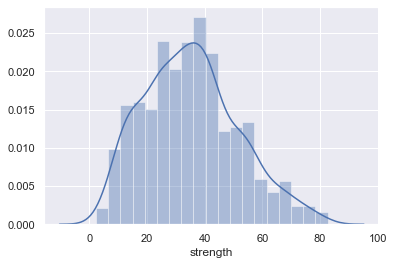

In [13]:
sns.distplot(data['strength'])

In [14]:
from scipy import stats
print('The skewness of status is :',stats.skew(data['strength']))

The skewness of status is : 0.395105298044056


### - We can see that the data is normally distributed with not much of a skew. 

## Distributions of the predictors (continuous)

In [15]:
X = data.drop('strength',axis=1)

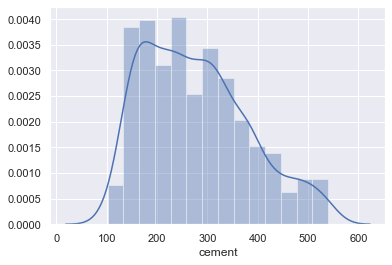

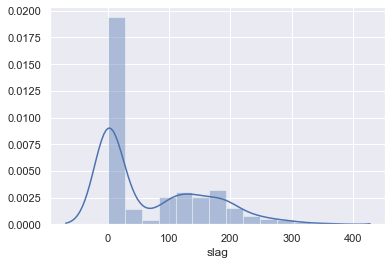

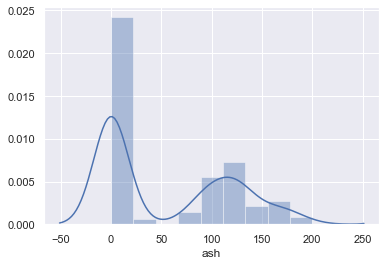

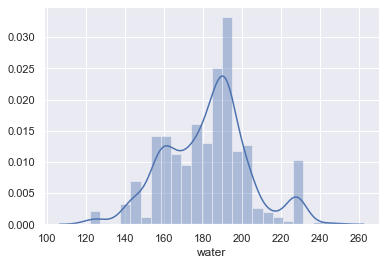

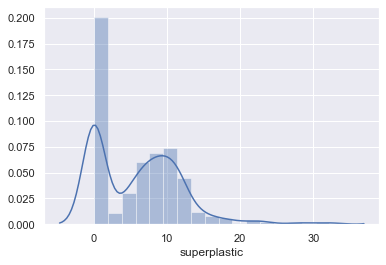

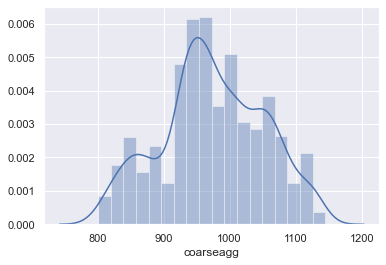

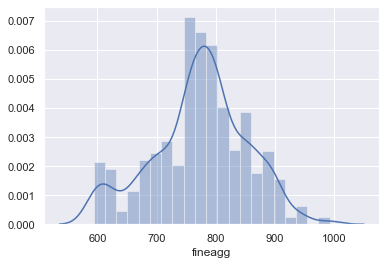

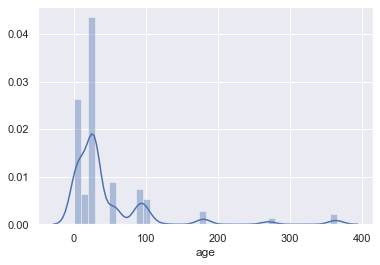

In [16]:
c_cols = X.columns.to_list()
for column in c_cols :
    plt.close()
    sns.distplot(data[column])
    plt.show()

### 1) We can see that all the continuous predictors are skewed towards the right hand side except 'courseagg'.
### 2) The skewness values specified below.

In [17]:
# Checking for the skewness is the predictors

from scipy import stats
skews = []
for i in c_cols:
    skew = stats.skew(data[i])
    skews.append(skew)
for i in range(len(skews)) :
    print('The skewness of ',c_cols[i],'is: ',skews[i])

The skewness of  cement is:  0.5641153988986095
The skewness of  slag is:  0.8539479129539447
The skewness of  ash is:  0.49648882209587886
The skewness of  water is:  0.034381793851841036
The skewness of  superplastic is:  0.9791401246984148
The skewness of  coarseagg is:  -0.06515856141355447
The skewness of  fineagg is:  -0.25197637809521817
The skewness of  age is:  3.249115025189808


### 1) All the variables are skewed towards the right-hand side, except coarseagg and fineagg, that are skewed towards the left-hand side.
### 2) 'cement' column has one gaussian.
### 3) 'slag', 'ash' ,'fineagg' and 'superplastic' columns have two gaussians.
### 4) 'water' and 'coarseagg' columns have three gaussians.
### 5) 'age' column has got many gaussians.

## 3) Using univariate & bivariate analysis to check the individual attributes for
## their basic statistics
## - Relationship between the target variable and each of the continuous variables(predictors)

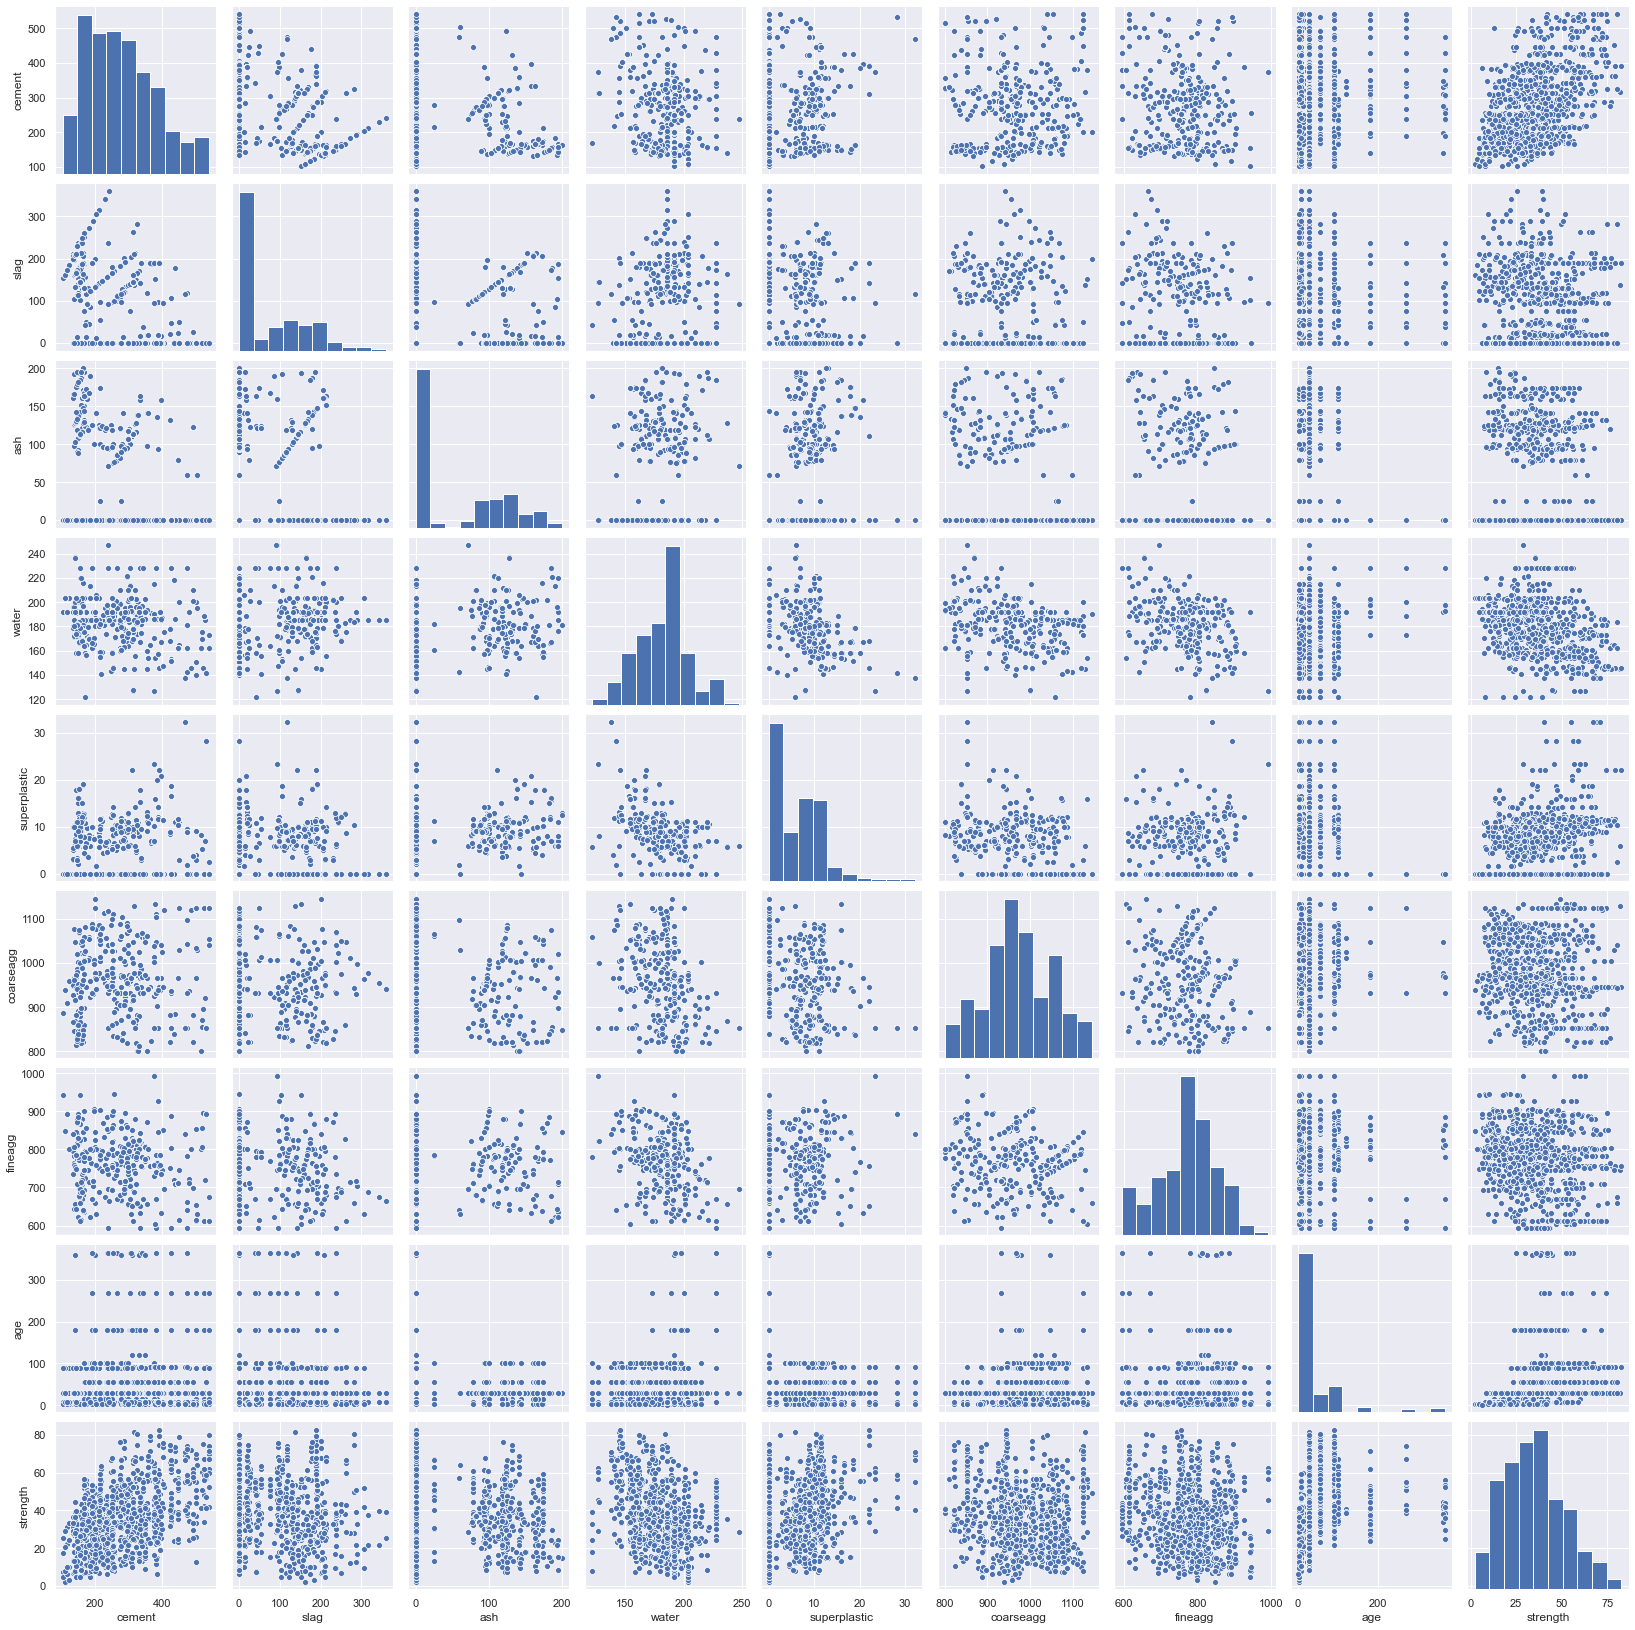

In [18]:
sns.pairplot(data)

## ------------------------------------------OUTLIER TREATMENT------------------------------------------

### NOTE : I have used the logical values (lower whisker/upper whisker) values for outlier treatment as I feel they are more close to outliers in comaprison with the median values

In [19]:
c_cols = data.columns.to_list()
c_cols

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

### A quick check as to which all columns have outliers present

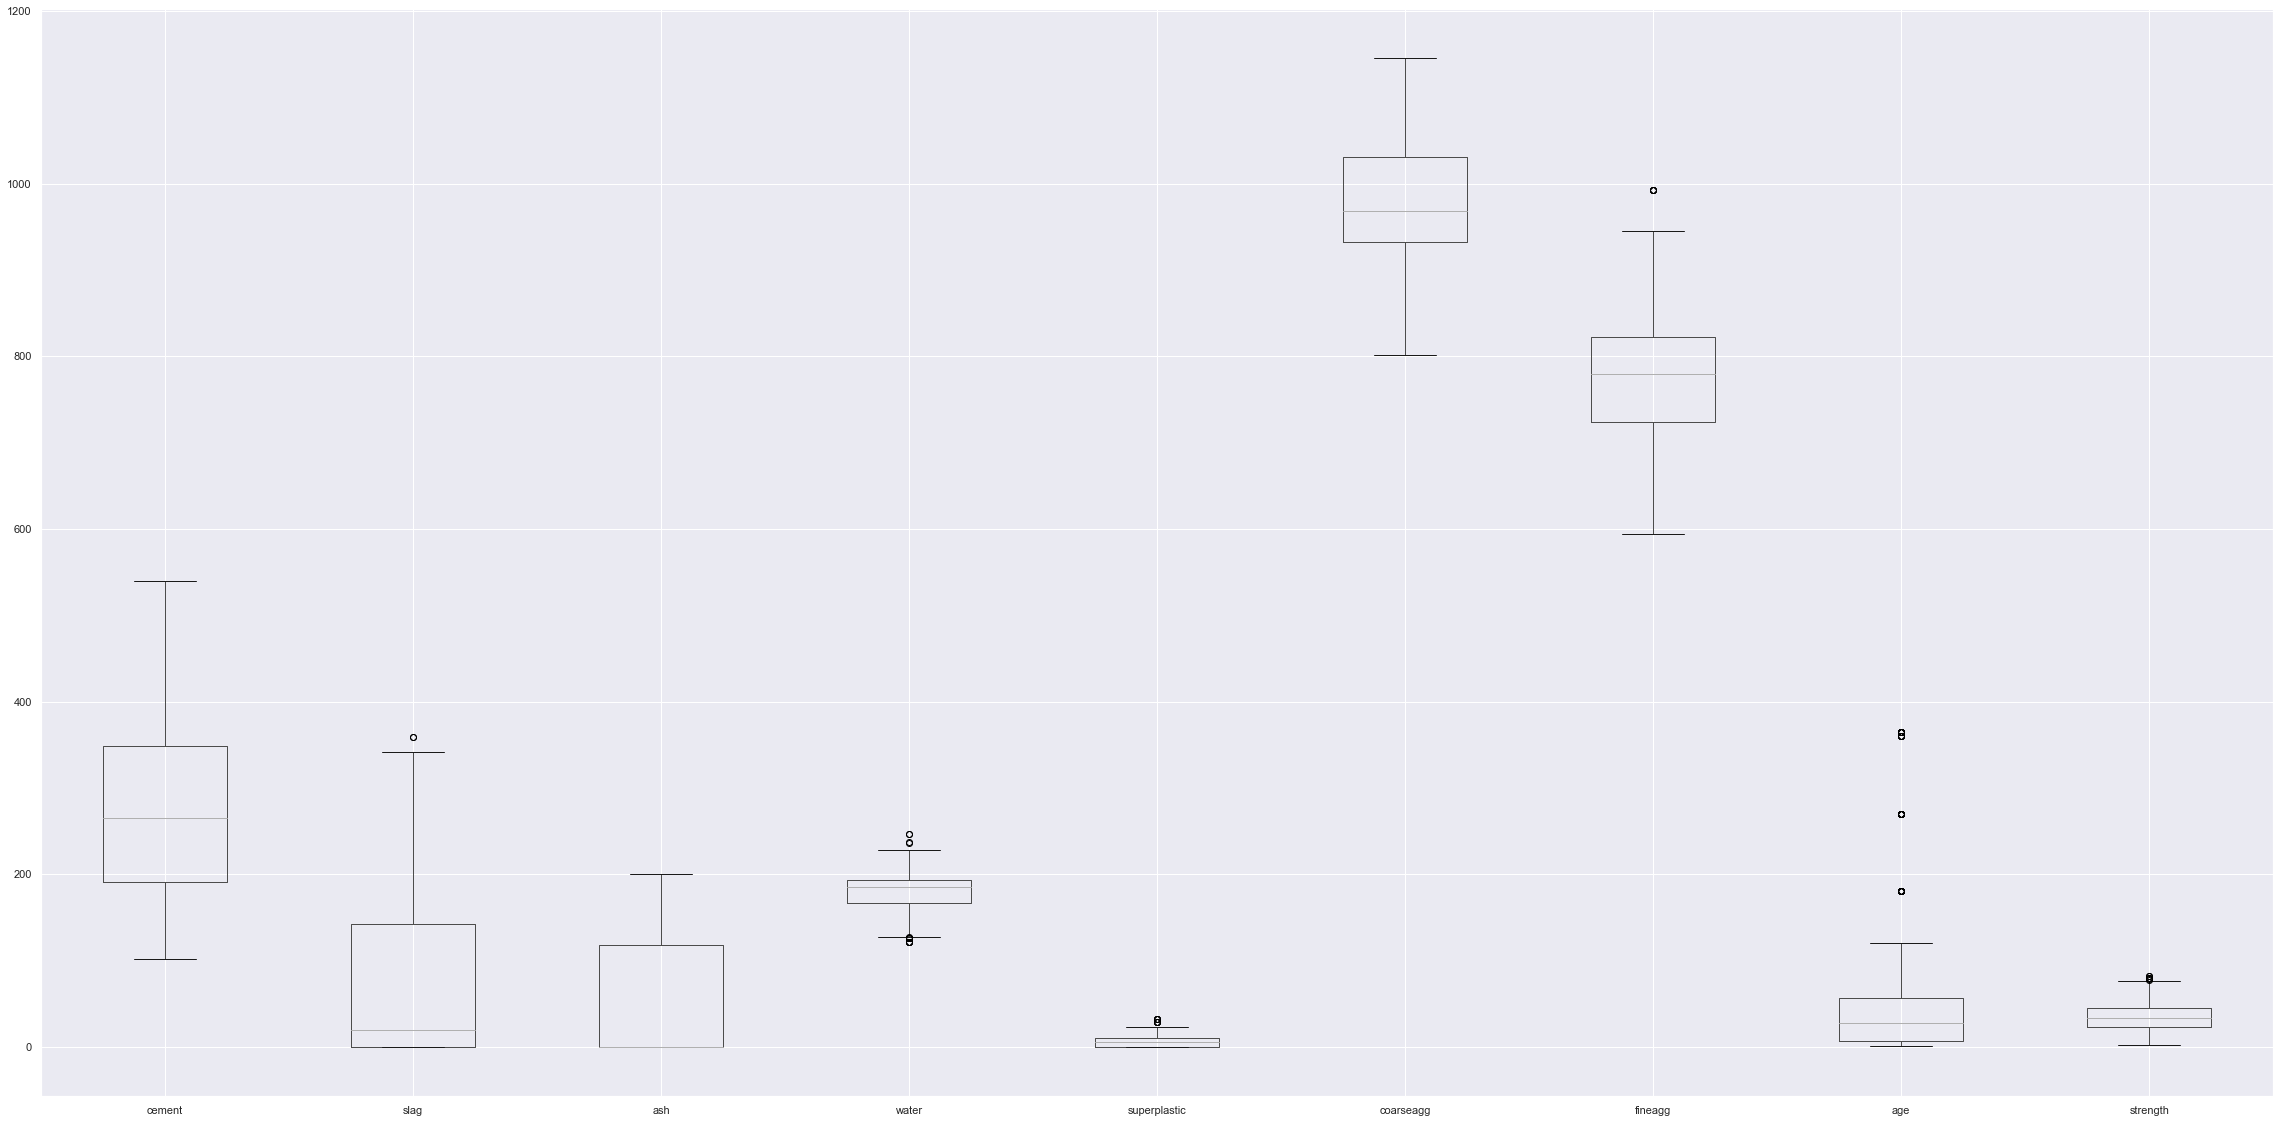

In [20]:
data.boxplot(figsize=(40,20))

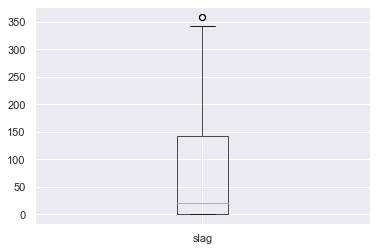

In [21]:
data.boxplot('slag')

### Removing outliers for 'slag' column

In [22]:
value = data[data['slag']<data['slag'].max()]['slag'].max()
value

342.1

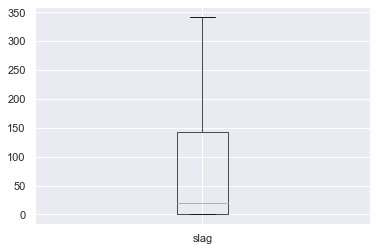

In [23]:
data['slag'][data['slag']>value]=value
data.boxplot('slag')

### Removing outliers for 'water' column

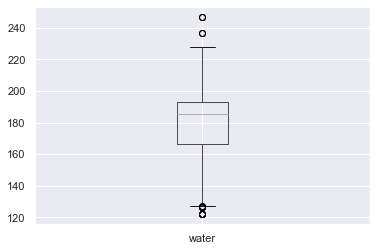

In [24]:
data.boxplot('water')

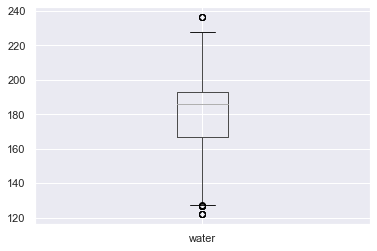

In [25]:
value1 = data[data['water']<240]['water'].max()
value2 = data[data['water']<value1]['water'].max()
data['water'][data['water']>value2]=value2
data.boxplot('water')

In [26]:
value= data[data['water']<236.7]['water'].max()
value

228.0

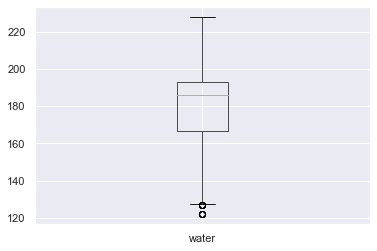

In [27]:
data['water'][data['water']>value]=value
data.boxplot('water')

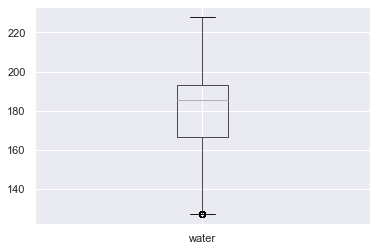

In [28]:
data['water'][data['water']<127]=127
data.boxplot('water')

### Removing outliers for 'superplastic' column

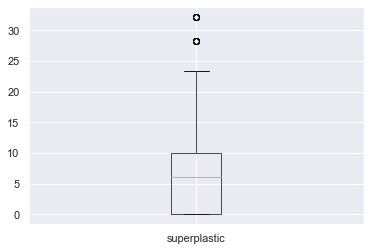

In [29]:
data.boxplot('superplastic')

In [30]:
value = data[data['superplastic']>25]['superplastic'].min()
value = data[data['superplastic']<value]['superplastic'].max()
data['superplastic'][data['superplastic']>value]=value

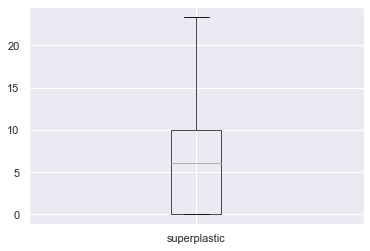

In [31]:
data.boxplot('superplastic')

### Removing outliers for 'fineagg' column

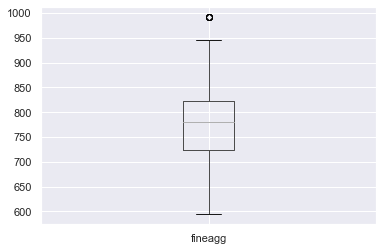

In [32]:
data.boxplot('fineagg')

In [33]:
value = data[data['fineagg']<=950]['fineagg'].max()
data['fineagg'][data['fineagg']>value]=value

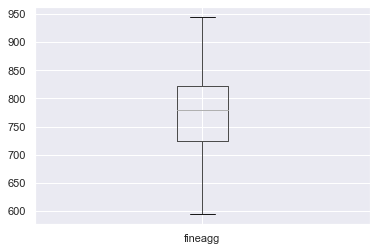

In [34]:
data.boxplot('fineagg')

### Removing outliers for 'age' column

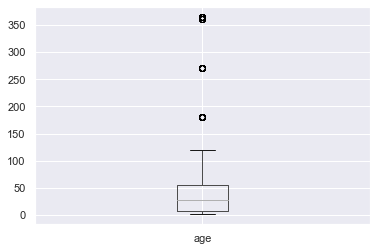

In [35]:
data.boxplot('age')

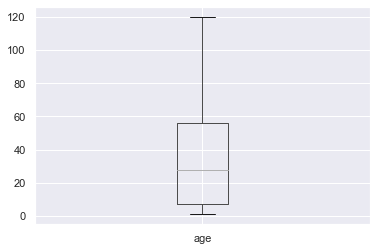

In [36]:
value = data[data['age']<150]['age'].max()
data['age'][data['age']>value]=value
data.boxplot('age')

In [37]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### -There are no null values present in the data set

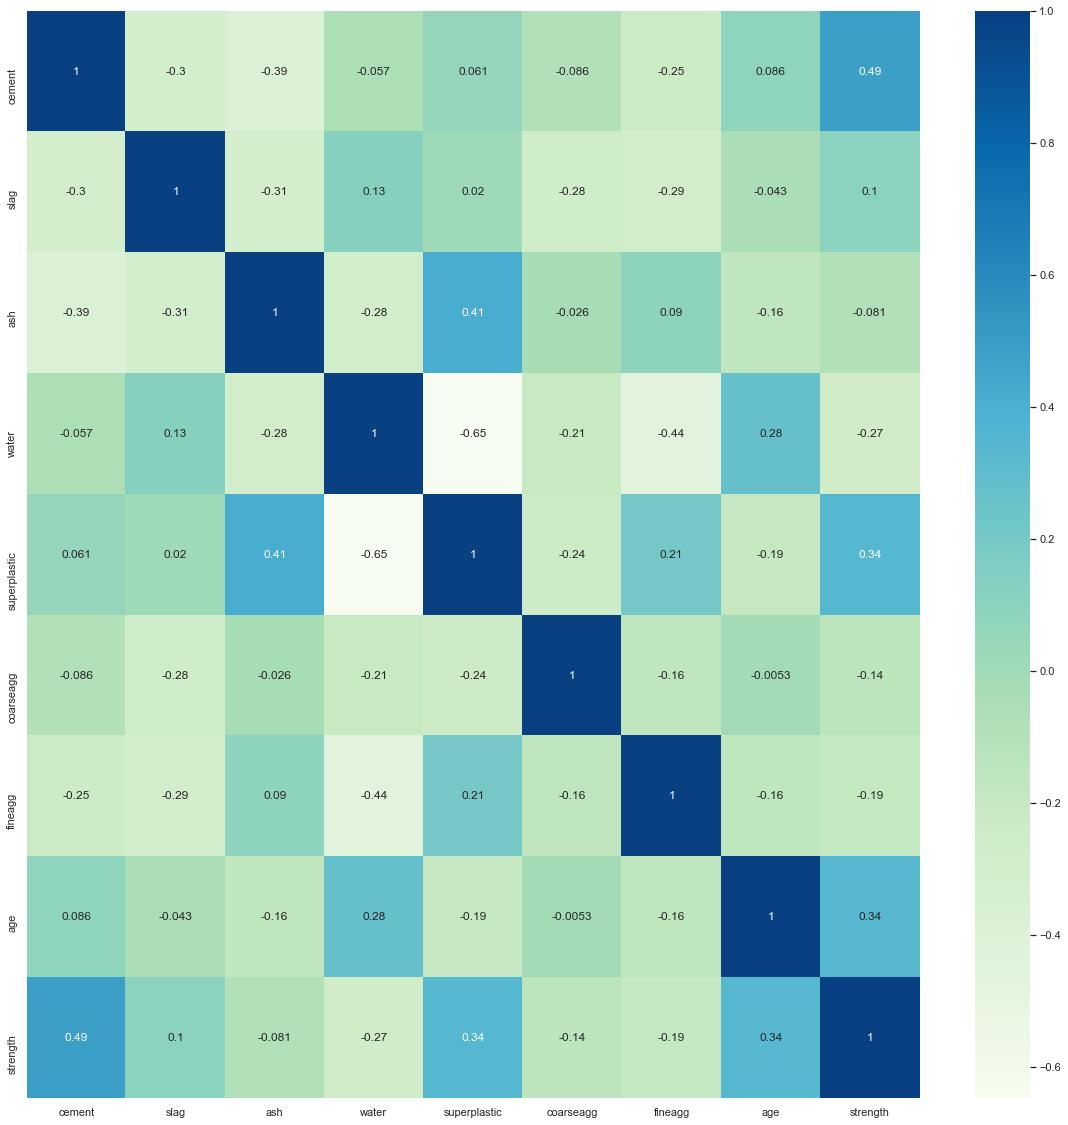

In [38]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True,ax=ax,cmap='GnBu')

### Saving the dataframe as a pickle file so that the data can be loaded quickly and used in the models

In [39]:
data.to_pickle('cement_data.pickle')

In [40]:
cement_data = pd.read_pickle('cement_data.pickle')
cement_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## -The data has been processed and can be used in the models. 

# --------------------------------------------------------------------------------------------------------------

## 4) --- Machine Learning ---

In [41]:
c_cols.remove('strength')
c_cols

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='strength'
Predictors=c_cols
X=cement_data[Predictors].values
y=cement_data[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [43]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 8)
(703,)
(302, 8)
(302,)


## -- LINEAR REGRESSION --

In [44]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
lreg_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',lreg_accuracy,'%')


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+" "+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

LinearRegression()
R2 Value: 0.7342050396958746
Accuracy on Test Data: 78.94 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,30.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,40.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,19.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,32.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,17.0


## -- KNN --

In [45]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Measuring accuracy on Testing Data
KNN_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',KNN_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

KNeighborsRegressor(n_neighbors=2)
R2 Value: 0.9124155898311319
Accuracy on Test Data: 78.76 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predictedstrength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,35.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,34.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,15.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,33.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,13.0


## -- SVM --

In [46]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5000, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Measuring accuracy on Testing Data
SVM_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',SVM_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+' '+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

SVR(C=5000, degree=20, gamma=0.01)
R2 Value: 0.9981143331849259
Accuracy on Test Data: 72.15 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,36.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,34.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,36.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,36.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,10.0


## -- DECISION TREE --

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.6185884271558904
Accuracy on Test Data: 72.95 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,40.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,26.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,15.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,26.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,26.0


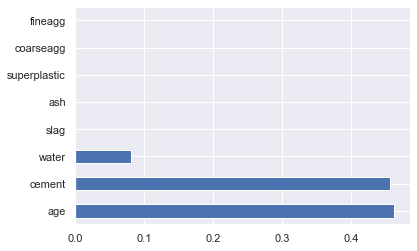

In [47]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
DT_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',DT_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+' '+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

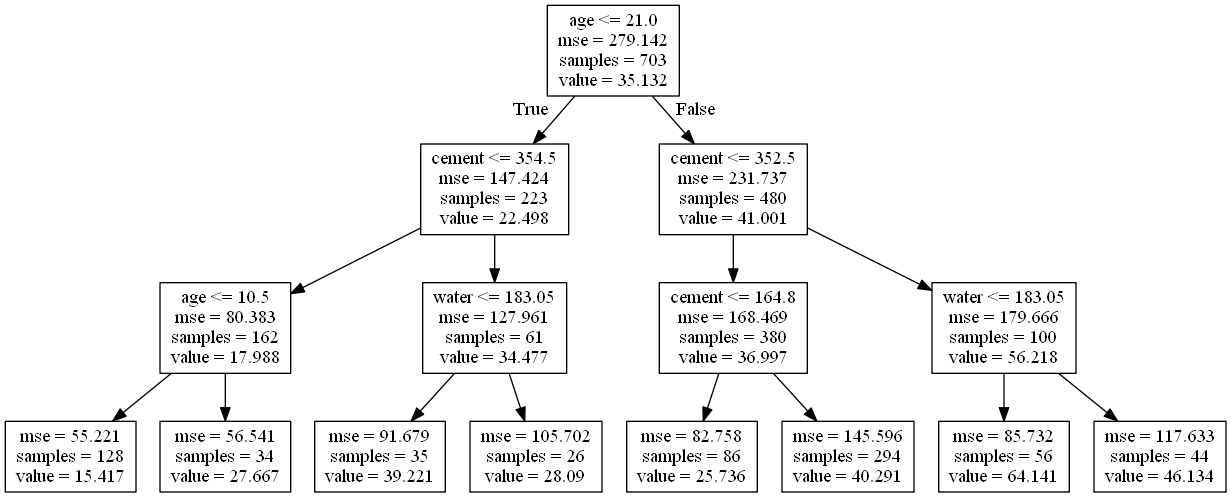

In [48]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## -- RANDOM FOREST --

RandomForestRegressor(max_depth=2, n_estimators=1000)
R2 Value: 0.566516695997025
Accuracy on Test Data: 69.22 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,39.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,35.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,18.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,35.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,35.0


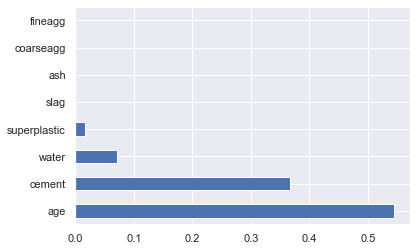

In [49]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=1000,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
RF_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',RF_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+' '+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### "age" is the feature that has got the maximum importance here.

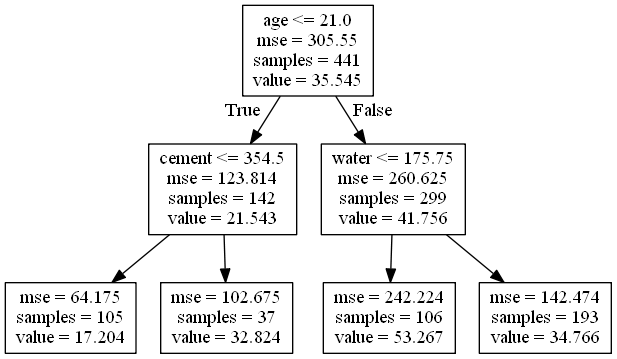

In [50]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 8th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[7] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## -- ADABOOST --

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.7, n_estimators=500)
R2 Value: 0.4834665112563885
Accuracy on Test Data: 63.34 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,55.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,33.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,22.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,32.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,29.0


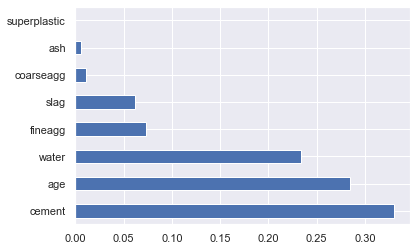

In [51]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.7)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Measuring accuracy on Testing Data
AB_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',AB_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+' '+ TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### We can see that "cement" feature has got the maximum importance here.

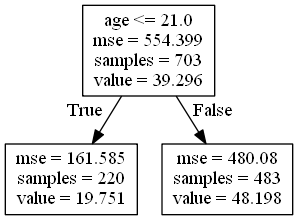

In [52]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 10th Decision Tree in AdaBoost
dot_data = tree.export_graphviz(RegModel.estimators_[10] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## -- XG BOOST --

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
R2 Value: 0.9913469549707803
Accuracy on Test Data: 91.11 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predicted strength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,37.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,34.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,17.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,27.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,11.0


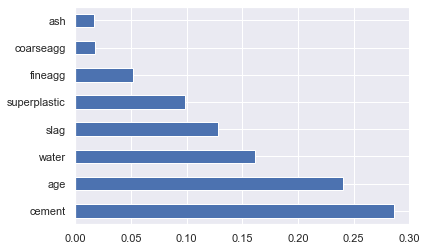

In [53]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.2, n_estimators=2000, objective='reg:squarederror', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
XGB_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',XGB_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+' '+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### We can see that "cement" is the feature has got the maximum importance here.

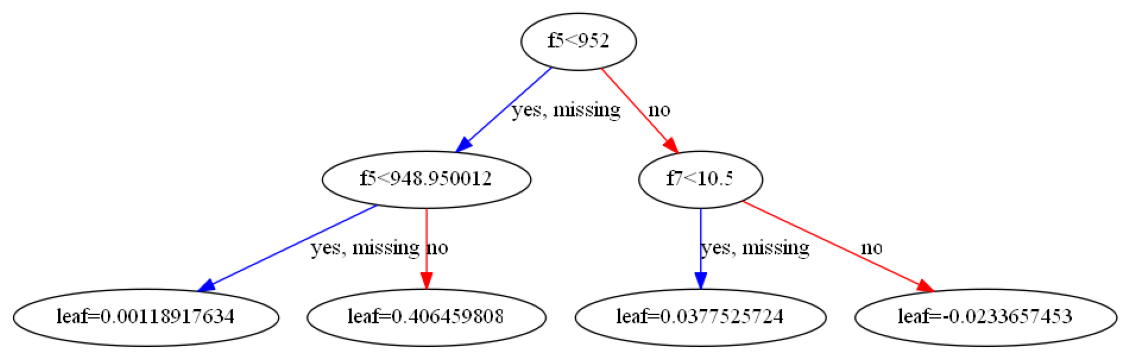

In [54]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=500, ax=ax)

## -- STACKING REGRESSOR --

In [55]:
lr = LinearRegression()

In [56]:
from sklearn.ensemble import StackingRegressor

# Creating a Stacking Classifier with the base learners as the estimators and the logistic regression model created as the meta-classifier
model_sreg = StackingRegressor(
    estimators=[('ABoost',AB),('Random_Forest',RF),('Linear_Regression',LREG),('dtree',DT),
                ('knn',KNN),('svm',SVM),('xgb',XGB)], 
    final_estimator=lr)

In [57]:
model_sreg.fit(X_train,y_train)
prediction=model_sreg.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, model_sreg.predict(X_train)))

# Measuring accuracy on Testing Data
SREG_accuracy = np.round(100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100),2)
print('Accuracy on Test Data:',SREG_accuracy,'%')

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

R2 Value: 0.9901351700811731
Accuracy on Test Data: 91.44 %


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Predictedstrength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,33.02,37.0
1,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0,33.76,34.0
2,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7.0,11.96,17.0
3,149.0,236.0,0.0,176.0,13.0,847.0,893.0,28.0,32.96,27.0
4,155.0,0.0,143.0,193.0,9.0,877.0,868.0,28.0,9.74,10.0


## 5) Which is the best model??

In [58]:
print('The Accuracy of the Linear Regression model is :',lreg_accuracy,'%')
print('The Accuracy of the K-NN model is :',KNN_accuracy,'%')
print('The Accuracy of the SVM model is :',SVM_accuracy,'%')
print('The Accuracy of the Decision Tree Regressor is :',DT_accuracy,'%')
print('The Accuracy of the Random Forest Regresso is :',RF_accuracy,'%')
print('The Accuracy of the ADA Boost Regressor is :',AB_accuracy,'%')
print('The Accuracy of the XG Boost Regressor is :',XGB_accuracy,'%')
print('The Accuracy of the Stacking Regressor is :',SREG_accuracy,'%')

The Accuracy of the Linear Regression model is : 78.94 %
The Accuracy of the K-NN model is : 78.76 %
The Accuracy of the SVM model is : 72.15 %
The Accuracy of the Decision Tree Regressor is : 72.95 %
The Accuracy of the Random Forest Regresso is : 69.22 %
The Accuracy of the ADA Boost Regressor is : 63.34 %
The Accuracy of the XG Boost Regressor is : 91.11 %
The Accuracy of the Stacking Regressor is : 91.44 %


In [59]:
Accuracy_df = pd.DataFrame(data=[
    ['Linear Regression',lreg_accuracy],
    ['KNN',KNN_accuracy],    
    ['SVM',SVM_accuracy],
    ['Decision Tree',DT_accuracy],
    ['Random Forest',RF_accuracy],
    ['ADA-Boost',AB_accuracy],
    ['XG-Boost',XGB_accuracy],
    ['Stacking Regressor',SREG_accuracy]],
    columns=['Model','Accuracy'])

In [60]:
style = sns.light_palette('green',as_cmap=True)
Accuracy = Accuracy_df.sort_values(by='Accuracy',ascending=False)
Accuracy = Accuracy.style.background_gradient(cmap=style)
Accuracy

,Model,Accuracy
7,Stacking Regressor,91.440000
6,XG-Boost,91.110000
0,Linear Regression,78.940000
1,KNN,78.760000
3,Decision Tree,72.950000
2,SVM,72.150000
4,Random Forest,69.220000
5,ADA-Boost,63.340000


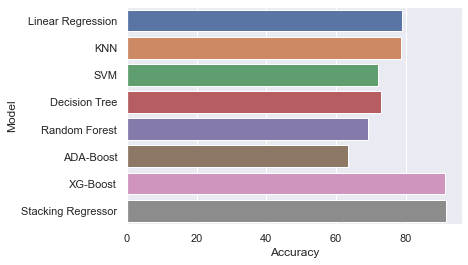

In [61]:
# Bar plot of the accuracies of the different classifier models
acc_bar = sns.barplot(x='Accuracy',y='Model',data=Accuracy_df)

# CONCLUSION :
## 1) We can clearly see that the performance of the "Stacking Regressor" model is much better than that of the other models.  
## 2) Reason being that the stacking regressor is a combination of many of the regression models, whose outputs are fed into the meta-regressor to make the final predictions.
## 3) This final meta-classifier model is a very powerful model that combines the output of all the base learners, that were already trained before.
## 4) After testing the models by removing many variables, I realized that I got the maximum accuracy when all the variables were retained. hence, none of the variables has been dropped.

# --------------------------------------------------------------------------------------------------------------